### Goal of the case study
The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles. Four Corgie model vehicles were used for the experiment:

Double decker bus
Cheverolet van
Saab 9000 car
Opel Manta 400 car.
This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars. The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

In [244]:
#importing all the package required for initial analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import model_selection, metrics, preprocessing
from sklearn.naive_bayes import GaussianNB


vehicle_df = pd.read_csv("vehicle.csv")
print(vehicle_df.head().transpose())

                               0    1    2    3    4
compactness                   95   91  104   93   85
circularity                   48   41   50   41   44
distance_circularity          83   84  106   82   70
radius_ratio                 178  141  209  159  205
pr.axis_aspect_ratio          72   57   66   63  103
max.length_aspect_ratio       10    9   10    9   52
scatter_ratio                162  149  207  144  149
elongatedness                 42   45   32   46   45
pr.axis_rectangularity        20   19   23   19   19
max.length_rectangularity    159  143  158  143  144
scaled_variance              176  170  223  160  241
scaled_variance.1            379  330  635  309  325
scaled_radius_of_gyration    184  158  220  127  188
scaled_radius_of_gyration.1   70   72   73   63  127
skewness_about                 6    9   14    6    9
skewness_about.1              16   14    9   10   11
skewness_about.2             187  189  188  199  180
hollows_ratio                197  199  196  20

#### Description of the columns in the dataset


**compactness** -	(average perimeter)^2/area 

**circularity** - 	(average radius)^2/area 

**distance_circularity** - area/(av.distance from border)^2 

**radius_ratio** -	(max.rad-min.rad)/av.radius 

**pr.axis_aspect_ratio**	(minor axis)/(major axis) 

**max.length_aspect_ratio**	(length perp. max length)/(max length) 

**scatter_ratio**	(inertia about minor axis)/(inertia about major axis) 

**elongatedness**	area/(shrink width)^2

**pr.axis_rectangularity**	area/(pr.axis length*pr.axis width) 

**max.length_rectangularity** area/(max.length*length perp. to this) 

**scaled_variance** (2nd order moment about minor axis)/area
 

**scaled_variance.1** (2nd order moment about major axis)/area


**scaled_radius_of_gyration**	(major axis var+minor axis var)/area 

**skewness_about** (3rd order moment about major axis)/sigma_min^3 
 

**skewness_about.1** (3rd order moment about minor axis)/sigma_maj^3 

**skewness_about.2** (3rd order moment about minor axis)/sigma_maj^3 
 
**hollows_ratio**	(area of hollows)/(area of bounding polygon) 

Where sigma_maj^2 is the variance along the major axis and sigma_min^2 is the variance along the minor axis, and 

area of hollows= area of bounding poly-area of object 

The area of the bounding polygon is found as a side result of the computation to find the maximum length. Each individual length computation yields a pair of calipers to the object orientated at every 5 degrees. The object is propagated into an image containing the union of these calipers to obtain an image of the bounding polygon. 

class - Has four unique values OPEL, SAAB, BUS, VAN 


In [245]:
vehicle_df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [246]:
vehicle_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

As we can see from the dataset description above, there are a some missing values in the dataset. We will impute these values with the median value of the respective columns.

In [247]:
vehicle_df['class'] = vehicle_df['class'].astype('category') 
class_outcome = vehicle_df['class']

vehicle_impute_df = vehicle_df.copy()

for col in vehicle_impute_df.columns:
    if(col != "class"):
        col_med = vehicle_impute_df.loc[:,col].median()
        vehicle_impute_df[col].fillna(col_med,inplace=True)


In [248]:
vehicle_impute_df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

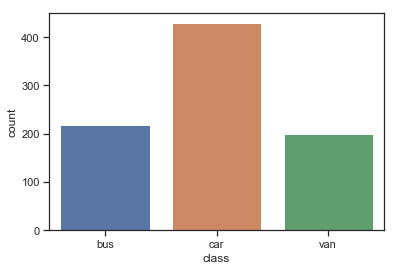

In [249]:
sns.countplot(class_outcome)

The dataset looks balanced. There two kinds of cars, one kind of van and one kind of bus. This ratio is apparent from the visualization above.

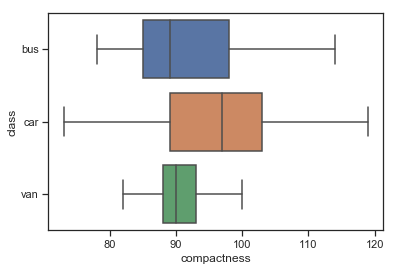

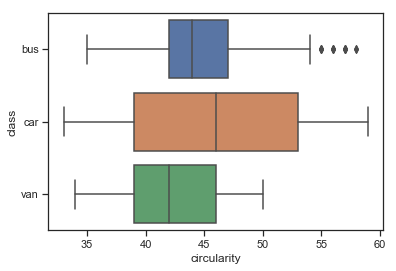

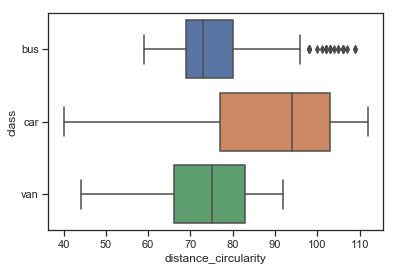

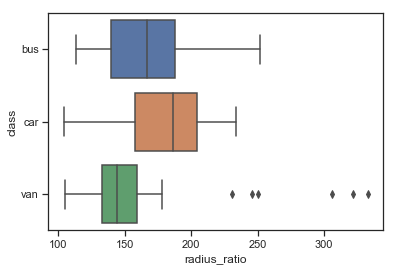

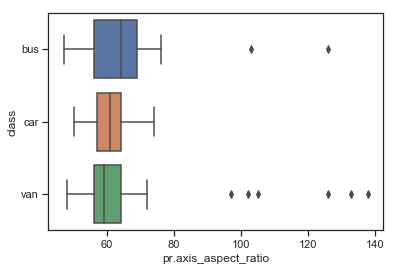

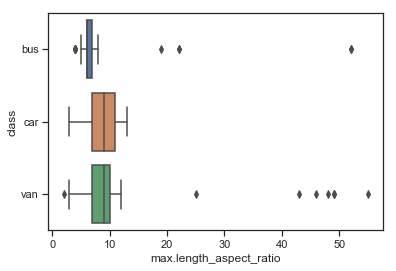

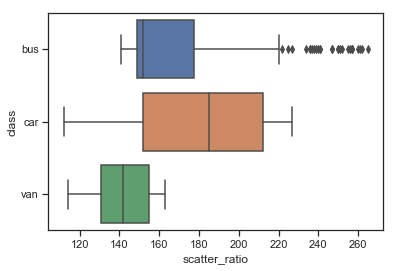

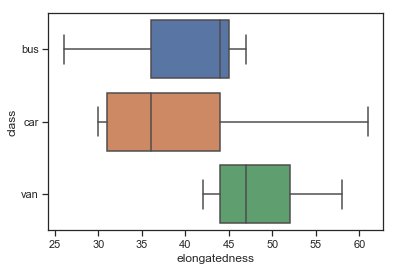

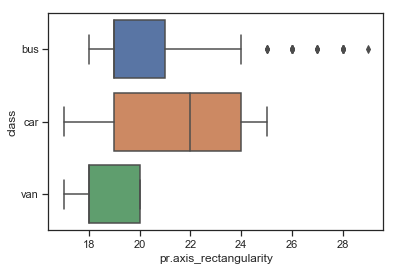

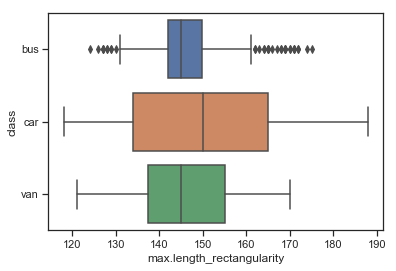

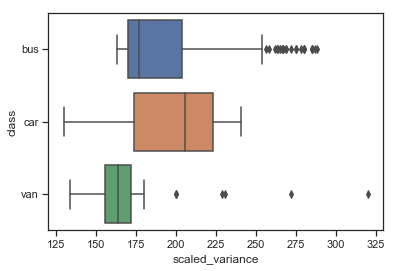

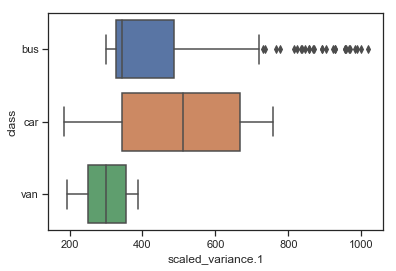

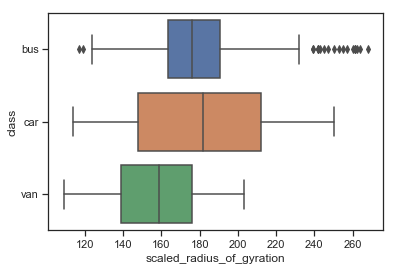

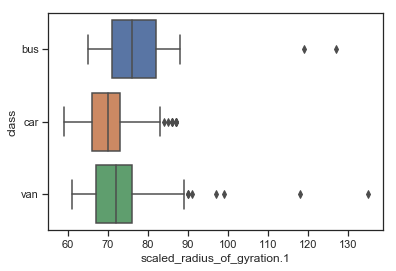

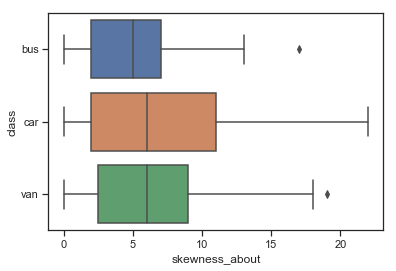

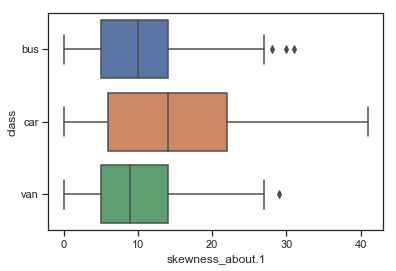

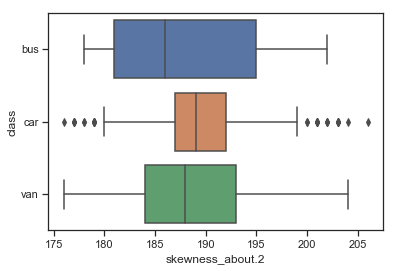

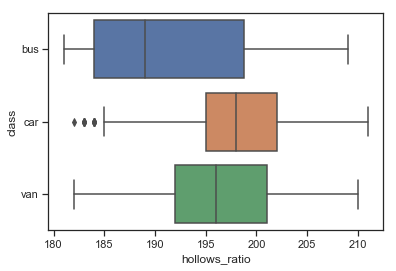

In [250]:
sns.set(style="ticks")
for col in vehicle_impute_df.columns:
    if(col != "class"):
        sns.boxplot(x=col, y="class",data=vehicle_impute_df)
        plt.show()

### Outlier treatment using capping
As we can observe from the box plots above the following features seem to have outliers. We will use capping to treat the outliers.

Outliers in Column  radius_ratio
[306.0, 322.0, 333.0]
Outliers in Column  pr.axis_aspect_ratio
[103.0, 126.0, 126.0, 133.0, 102.0, 138.0, 97.0, 105.0]
Outliers in Column  max.length_aspect_ratio
[52, 49, 52, 22, 48, 43, 49, 25, 46, 19, 2, 55, 22]
Outliers in Column  scaled_variance
[320.0]
Outliers in Column  scaled_variance.1
[998.0, 1018.0]
Outliers in Column  scaled_radius_of_gyration.1
[127.0, 118.0, 88.0, 88.0, 119.0, 97.0, 89.0, 90.0, 88.0, 135.0, 88.0, 91.0, 90.0, 99.0, 88.0]
Outliers in Column  skewness_about
[20.0, 21.0, 22.0, 20.0, 21.0, 21.0, 21.0, 22.0, 22.0, 22.0, 20.0, 21.0]
Outliers in Column  skewness_about.1
[41.0]


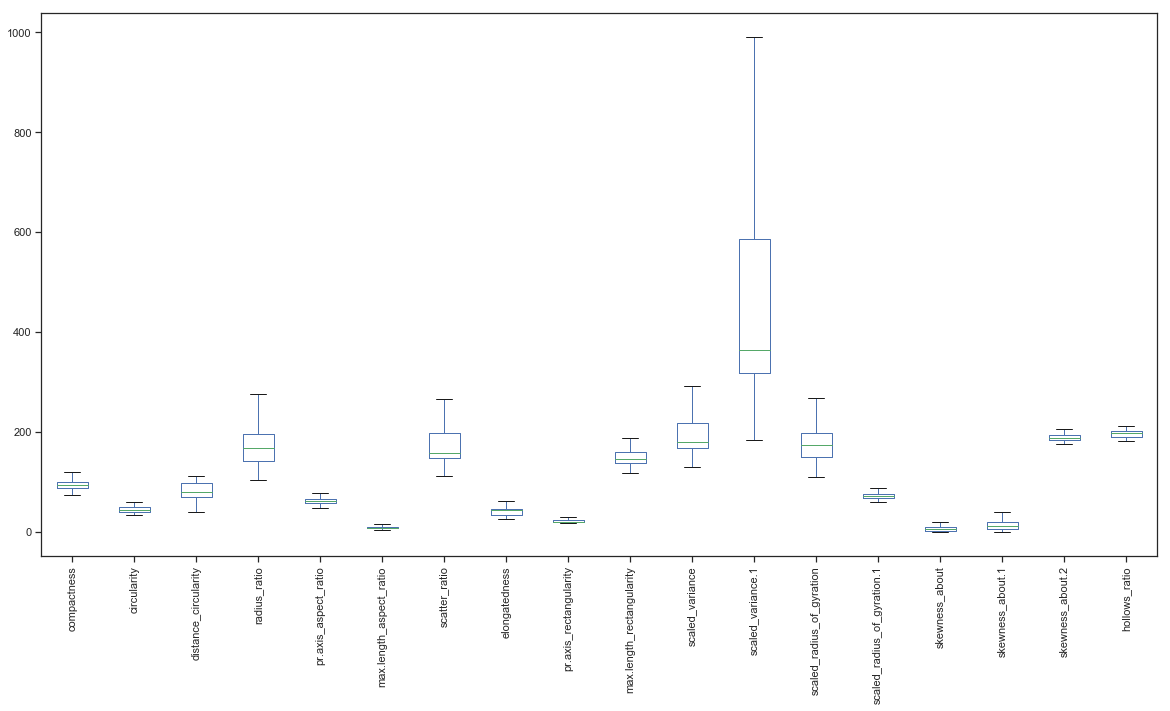

In [251]:
for col in vehicle_impute_df.columns:
    if(col != "class"):
        q1, col_median, q3= np.percentile(vehicle_impute_df[col],[25,50,75])
        iqr = q3-q1
        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr) 
        outliers=[]
        for val in vehicle_impute_df[col]:
            if val < lower_bound or val>upper_bound:
                outliers.append(val)
        if(len(outliers)>0):
            print("Outliers in Column ",col)
            print(outliers)
        vehicle_impute_df.loc[(vehicle_impute_df[col] > upper_bound),col] = upper_bound
        vehicle_impute_df.loc[(vehicle_impute_df[col] < lower_bound),col] = lower_bound
    


#Box plot the dataframe after outlier treatment.
vehicle_impute_df.plot(kind='box', figsize=(20,10),legend=True, rot=90)
    
    



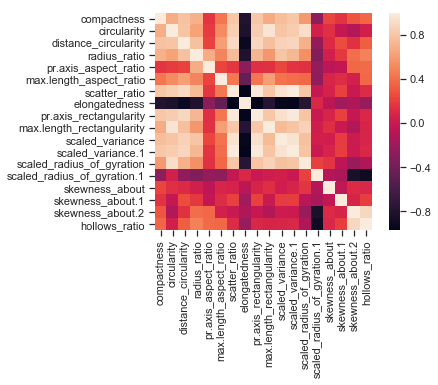

In [252]:
vehicle_impute_df.drop(labels='class', axis = 1, inplace=True)
sns.heatmap(vehicle_impute_df.corr(), square=True)


The heat map above shows high correlation between many features in the dataset. 
Let's do Recursive feature elimination to figure out which features can be done away, as there is high correlation between the data.

In [253]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class="auto",solver="liblinear")
X = np.array(vehicle_impute_df)
y = np.array(class_outcome)
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state=1)

for num_features in range(1,19):
    rfe = RFE(model, num_features)
    rfe.fit(X_train,y_train)
    print(num_features," - ",rfe.score(X_test, y_test))


1  -  0.547244094488189
2  -  0.5708661417322834
3  -  0.6692913385826772
4  -  0.7125984251968503
5  -  0.8149606299212598
6  -  0.7992125984251969
7  -  0.8110236220472441
8  -  0.8070866141732284
9  -  0.8582677165354331
10  -  0.8661417322834646
11  -  0.8818897637795275
12  -  0.9015748031496063
13  -  0.937007874015748
14  -  0.9488188976377953
15  -  0.9448818897637795
16  -  0.9488188976377953
17  -  0.9488188976377953
18  -  0.952755905511811


As we can see above the accuracy goes down only by .4% even when reduced to 14 features. Let's see which features can be selected with minimal loss of accuracy.



compactness
circularity
distance_circularity
radius_ratio
pr.axis_aspect_ratio
max.length_aspect_ratio
scatter_ratio
elongatedness
pr.axis_rectangularity
max.length_rectangularity
scaled_variance
scaled_radius_of_gyration.1
skewness_about.2
hollows_ratio


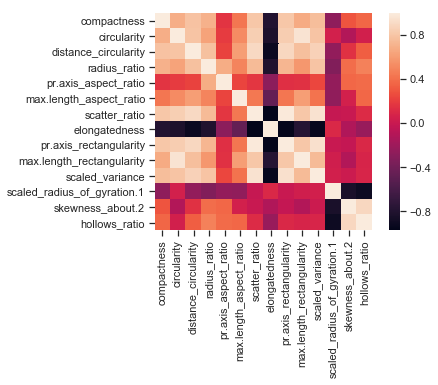

In [254]:
rfe = RFE(model, 14)
rfe.fit(X_train,y_train)
vehicle_rfe_df = vehicle_impute_df.copy()

for i in range(0,len(vehicle_impute_df.columns)):
    if rfe.ranking_[i] == 1:
        print(vehicle_impute_df.columns[i])
    else:
        vehicle_rfe_df.drop(labels=vehicle_impute_df.columns[i], axis = 1, inplace=True)

sns.heatmap(vehicle_rfe_df.corr(), square=True)

        

There is still a lot of correlation between the features and they are not independent. But let's go with the assumption that they are independent and do an SVM classification.

### Support Vector Classification


In [255]:
from sklearn.svm import SVC

clf = SVC(gamma="scale",kernel="linear")

X = np.array(vehicle_impute_df)
y = np.array(class_outcome)
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state=1)

clf.fit(X_train,y_train)


clf.score(X_test, y_test)
test_prediction = clf.predict(X_test)
print("Model Accuracy with test data : ",metrics.accuracy_score(y_test, test_prediction))

print("Confusion Matrix")

confusion_matrix = metrics.confusion_matrix(y_test, test_prediction, labels=class_outcome.unique())

print(confusion_matrix)

print(metrics.classification_report(y_test,test_prediction, \
                                    target_names=class_outcome.unique()))


Model Accuracy with test data :  0.952755905511811
Confusion Matrix
[[ 56   2   4]
 [  2 129   2]
 [  1   1  57]]
              precision    recall  f1-score   support

         van       0.90      0.97      0.93        59
         car       0.98      0.97      0.97       133
         bus       0.95      0.90      0.93        62

   micro avg       0.95      0.95      0.95       254
   macro avg       0.94      0.95      0.94       254
weighted avg       0.95      0.95      0.95       254



### Cross-validated grid-search with SVC

In [256]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.01,0.05,0.5,1], 'gamma': ['scale'], 'kernel':['linear','rbf']}

clf = GridSearchCV(SVC(),param_grid,refit = True, verbose=2, cv=3)

clf.fit(X_train,y_train)


clf.score(X_test, y_test)
test_prediction = clf.predict(X_test)
print("Model Accuracy with test data : ",metrics.accuracy_score(y_test, test_prediction))

print("Confusion Matrix")

confusion_matrix = metrics.confusion_matrix(y_test, test_prediction, labels=class_outcome.unique())

print(confusion_matrix)

print(metrics.classification_report(y_test,test_prediction, \
                                    target_names=class_outcome.unique()))


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=0.01, gamma=scale, kernel=linear ..............................
[CV] ............... C=0.01, gamma=scale, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=scale, kernel=linear ..............................
[CV] ............... C=0.01, gamma=scale, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=scale, kernel=linear ..............................
[CV] ............... C=0.01, gamma=scale, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=scale, kernel=rbf .................................
[CV] .................. C=0.01, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=scale, kernel=rbf .................................
[CV] .................. C=0.01, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=scale, kernel=rbf .................................
[CV] .................. C=0.01, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.05, gamma=scale, kernel=linear ..............................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=0.05, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.05, gamma=scale, kernel=rbf .................................
[CV] .................. C=0.05, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.05, gamma=scale, kernel=rbf .................................
[CV] .................. C=0.05, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=scale, kernel=linear ...............................
[CV] ................ C=0.5, gamma=scale, kernel=linear, total=   0.1s
[CV] C=0.5, gamma=scale, kernel=linear ...............................
[CV] ................ C=0.5, gamma=scale, kernel=linear, total=   0.2s
[CV] C=0.5, gamma=scale, kernel=linear ...............................
[CV] ................ C=0.5, gamma=scale, kernel=linear, total=   0.4s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    1.4s finished


Model Accuracy with test data :  0.952755905511811
Confusion Matrix
[[ 56   2   4]
 [  2 129   2]
 [  1   1  57]]
              precision    recall  f1-score   support

         van       0.90      0.97      0.93        59
         car       0.98      0.97      0.97       133
         bus       0.95      0.90      0.93        62

   micro avg       0.95      0.95      0.95       254
   macro avg       0.94      0.95      0.94       254
weighted avg       0.95      0.95      0.95       254



In [257]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

X = np.array(vehicle_impute_df)
y = np.array(class_outcome)

X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state=1)

clf.fit(X_train,y_train)


clf.score(X_test, y_test)
test_prediction = clf.predict(X_test)
print("Model Accuracy with test data : ",metrics.accuracy_score(y_test, test_prediction))

print("Confusion Matrix")

confusion_matrix = metrics.confusion_matrix(y_test, test_prediction, labels=class_outcome.unique())

print(confusion_matrix)

print(metrics.classification_report(y_test,test_prediction, \
                                    target_names=class_outcome.unique()))



Model Accuracy with test data :  0.6220472440944882
Confusion Matrix
[[54  6  2]
 [45 85  3]
 [32  8 19]]
              precision    recall  f1-score   support

         van       0.79      0.32      0.46        59
         car       0.86      0.64      0.73       133
         bus       0.41      0.87      0.56        62

   micro avg       0.62      0.62      0.62       254
   macro avg       0.69      0.61      0.58       254
weighted avg       0.73      0.62      0.63       254



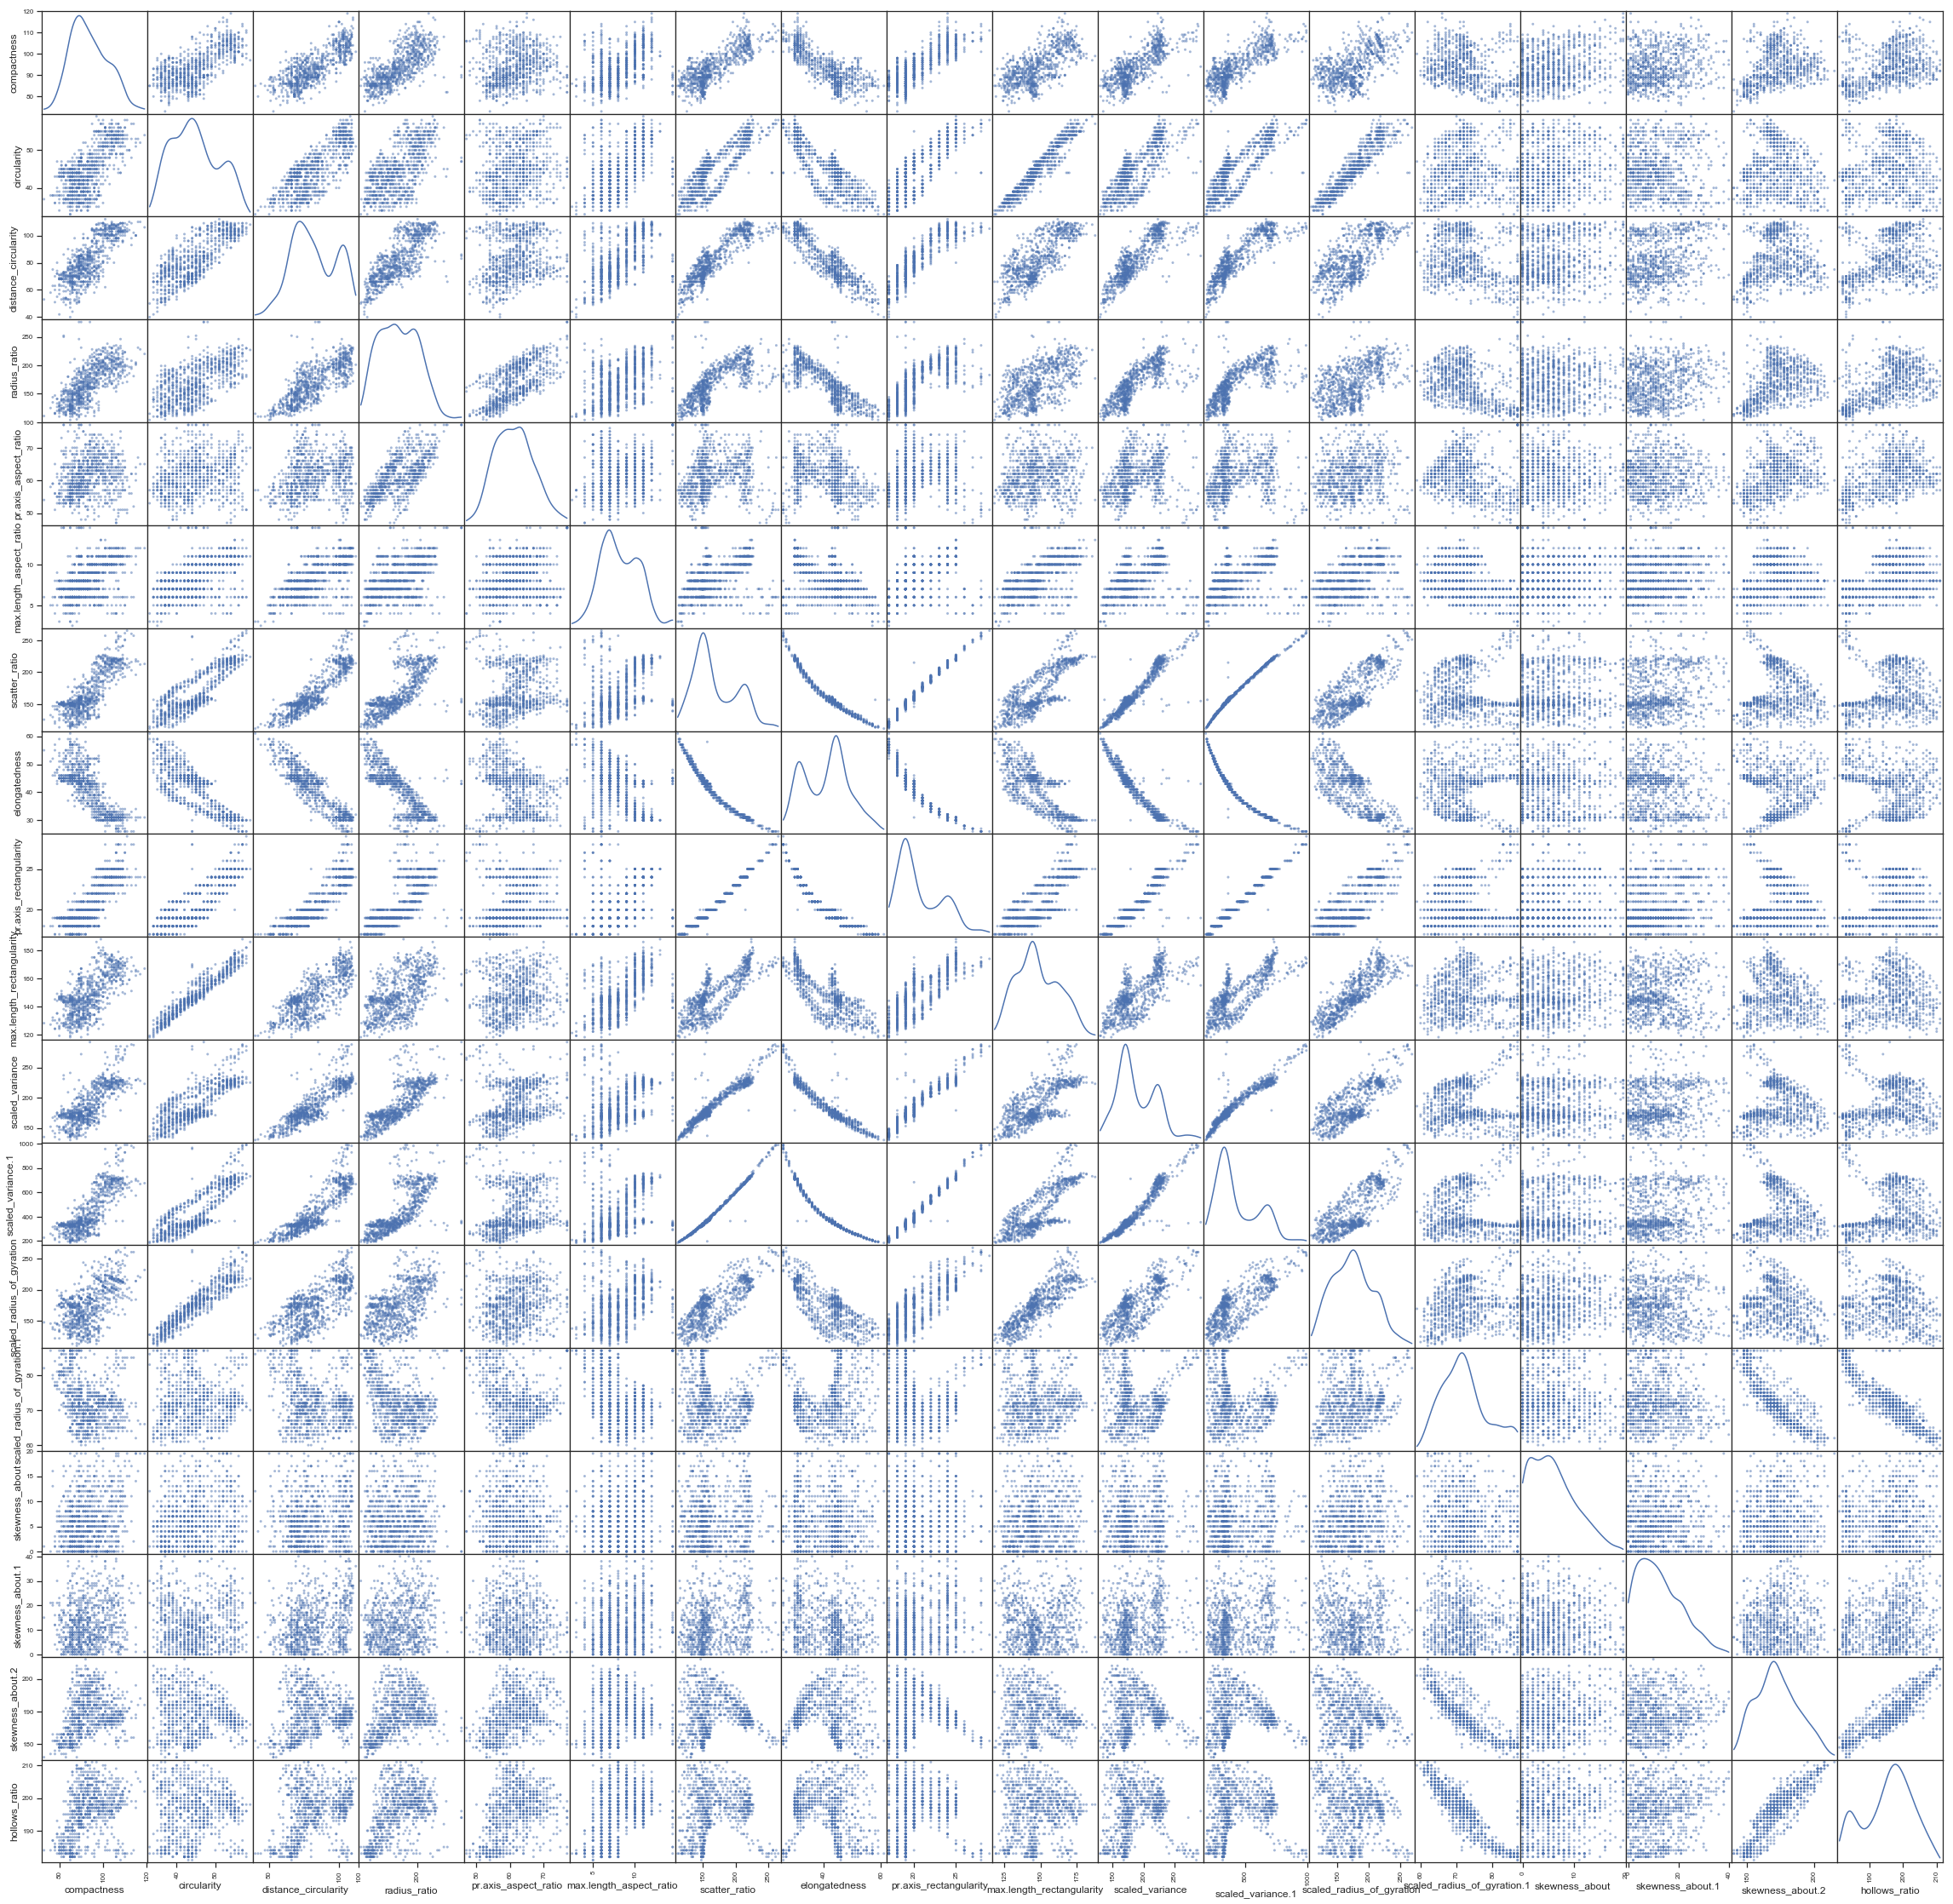

In [258]:
from pandas.plotting import scatter_matrix
spd = scatter_matrix(vehicle_impute_df, figsize = (40,40), diagonal='kde')

As we can see above, the Gaussian NaiveBayes model has low prediction accuracy whereas SVM has an accuracy of close to 95%. The scatter plot shows us the correlation between features. When the scatter plot is more like a cloud, it implies no correlation between the features. Since it is evident from the scatter plot many features are positively or negatively correlated, we should be able to combine the features to predict the result. Let's analyze and see if the results are more accurate and less of an overfit in the production environment by doing a PCA before the SVM and Gaussian NB classification. Plotting the cumulative sum of the explained variance ratio will help us assess the number of components we should pass as hyperparameter to the PCA. But before performing PCA we should normalize the data primarily because it is variance maximizing exercise. We will use the min max scaling to acieve this. 

In [259]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(vehicle_impute_df)
MinMaxScaler(copy=True, feature_range=(0, 1))

transformedArr = scaler.transform(vehicle_impute_df)

transform_df = pd.DataFrame(transformedArr)
transform_df.columns = vehicle_impute_df.columns

transform_df.describe().transpose()

count      mean       std  min       25%  \
compactness                  846.0  0.449532  0.179010  0.0  0.304348   
circularity                  846.0  0.454765  0.235934  0.0  0.269231   
distance_circularity         846.0  0.584729  0.218633  0.0  0.416667   
radius_ratio                 846.0  0.376265  0.190578  0.0  0.215116   
pr.axis_aspect_ratio         846.0  0.476872  0.193978  0.0  0.333333   
max.length_aspect_ratio      846.0  0.475325  0.183877  0.0  0.375000   
scatter_ratio                846.0  0.371815  0.216978  0.0  0.228758   
elongatedness                846.0  0.426748  0.223197  0.0  0.200000   
pr.axis_rectangularity       846.0  0.298365  0.215713  0.0  0.166667   
max.length_rectangularity    846.0  0.428555  0.207366  0.0  0.271429   
scaled_variance              846.0  0.361505  0.192816  0.0  0.228395   
scaled_variance.1            846.0  0.316910  0.218941  0.0  0.166667   
scaled_radius_of_gyration    846.0  0.413251  0.204694  0.0  0.251572   
scaled_radius_of_gyration.1  846.0  0.472096  0.231114  0.0  0.285714   
skewness_about               846.0  0.325089  0.248105  0.0  0.102564   
skewness_about.1             846.0  0.314982  0.223182  0.0  0.125000   
skewness_about.2             846.0  0.430615  0.205075  0.0  0.266667   
hollows_ratio                846.0  0.487746  0.247960  0.0  0.308333   

                                  50%       75%  max  
compactness                  0.434783  0.586957  1.0  
circularity                  0.423077  0.615385  1.0  
distance_circularity         0.555556  0.805556  1.0  
radius_ratio                 0.366279  0.529070  1.0  
pr.axis_aspect_ratio         0.466667  0.600000  1.0  
max.length_aspect_ratio      0.458333  0.625000  1.0  
scatter_ratio                0.294118  0.562092  1.0  
elongatedness                0.485714  0.571429  1.0  
pr.axis_rectangularity       0.250000  0.500000  1.0  
max.length_rectangularity    0.400000  0.585714  1.0  
scaled_variance              0.302469  0.537037  1.0  
scaled_variance.1            0.222843  0.500000  1.0  
scaled_radius_of_gyration    0.405660  0.559748  1.0  
scaled_radius_of_gyration.1  0.446429  0.571429  1.0  
skewness_about               0.307692  0.461538  1.0  
skewness_about.1             0.275000  0.475000  1.0  
skewness_about.2             0.400000  0.566667  1.0  
hollows_ratio                0.533333  0.666667  1.0

[0.51966379 0.7194508  0.79939037 0.86484328 0.90676983 0.94579002
 0.96374139 0.97435682 0.981273   0.98617205 0.98972771 0.99289113
 0.99531671 0.99708222 0.99826949 0.9992576  0.99982966 1.        ]


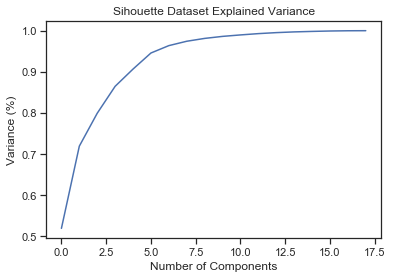

In [267]:
from sklearn.decomposition import PCA


pca = PCA().fit(transform_df)

print(np.cumsum(pca.explained_variance_ratio_))
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Sihouette Dataset Explained Variance')
plt.show()

From the plot above it is evident that if we have 7 components, we will cover more than 95% of variance. We will do PCA with 7 components.

In [270]:
pca = PCA(n_components=7, svd_solver="randomized")
pca.fit(transform_df)
pca_vehicle_impute_df = pca.transform(transform_df)


param_grid = {'C':[0.01,0.05,0.5,1], 'gamma': ['scale'], 'kernel':['linear','rbf']}

clf = GridSearchCV(SVC(),param_grid,refit = True, verbose=2, cv=10)

X = np.array(pca_vehicle_impute_df)
y = np.array(class_outcome)

X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state=1)

clf.fit(X_train,y_train)


clf.score(X_test, y_test)
test_prediction = clf.predict(X_test)
print("Model Accuracy with test data : ",metrics.accuracy_score(y_test, test_prediction))

print("Confusion Matrix")

confusion_matrix = metrics.confusion_matrix(y_test, test_prediction, labels=class_outcome.unique())

print(confusion_matrix)

print(metrics.classification_report(y_test,test_prediction, \
                                    target_names=class_outcome.unique()))


Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV] C=0.01, gamma=scale, kernel=linear ..............................
[CV] ............... C=0.01, gamma=scale, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=scale, kernel=linear ..............................
[CV] ............... C=0.01, gamma=scale, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=scale, kernel=linear ..............................
[CV] ............... C=0.01, gamma=scale, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=scale, kernel=linear ..............................
[CV] ............... C=0.01, gamma=scale, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=scale, kernel=linear ..............................
[CV] ............... C=0.01, gamma=scale, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=scale, kernel=linear ..............................
[CV] ............... C=0.01, gamma=scale, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=scale, kernel=linear ..............................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=0.01, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=scale, kernel=rbf .................................
[CV] .................. C=0.01, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=scale, kernel=rbf .................................
[CV] .................. C=0.01, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=scale, kernel=rbf .................................
[CV] .................. C=0.01, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=scale, kernel=rbf .................................
[CV] .................. C=0.01, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=scale, kernel=rbf .................................
[CV] .................. C=0.01, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.05, gamma=scale, kernel=linear ..............................
[CV] ............... C=0.05, gamma=scale, kernel=linear, total=   0.0s
[CV] C=0.05, gamma=scale, kernel=linear ..............................
[CV] .

[CV] ..................... C=1, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=1, gamma=scale, kernel=rbf ....................................
[CV] ..................... C=1, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=1, gamma=scale, kernel=rbf ....................................
[CV] ..................... C=1, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=1, gamma=scale, kernel=rbf ....................................
[CV] ..................... C=1, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=1, gamma=scale, kernel=rbf ....................................
[CV] ..................... C=1, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=1, gamma=scale, kernel=rbf ....................................
[CV] ..................... C=1, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=1, gamma=scale, kernel=rbf ....................................
[CV] ..................... C=1, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=1, gamma=scale, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.9s finished
/Users/lavanyas/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [271]:
clf = GaussianNB()

clf.fit(X_train,y_train)


clf.score(X_test, y_test)
test_prediction = clf.predict(X_test)
print("Model Accuracy with test data : ",metrics.accuracy_score(y_test, test_prediction))

print("Confusion Matrix")

confusion_matrix = metrics.confusion_matrix(y_test, test_prediction, labels=class_outcome.unique())

print(confusion_matrix)

print(metrics.classification_report(y_test,test_prediction, \
                                    target_names=class_outcome.unique()))


Model Accuracy with test data :  0.7992125984251969
Confusion Matrix
[[ 47   9   6]
 [ 10 117   6]
 [ 14   6  39]]
              precision    recall  f1-score   support

         van       0.76      0.66      0.71        59
         car       0.89      0.88      0.88       133
         bus       0.66      0.76      0.71        62

   micro avg       0.80      0.80      0.80       254
   macro avg       0.77      0.77      0.77       254
weighted avg       0.80      0.80      0.80       254



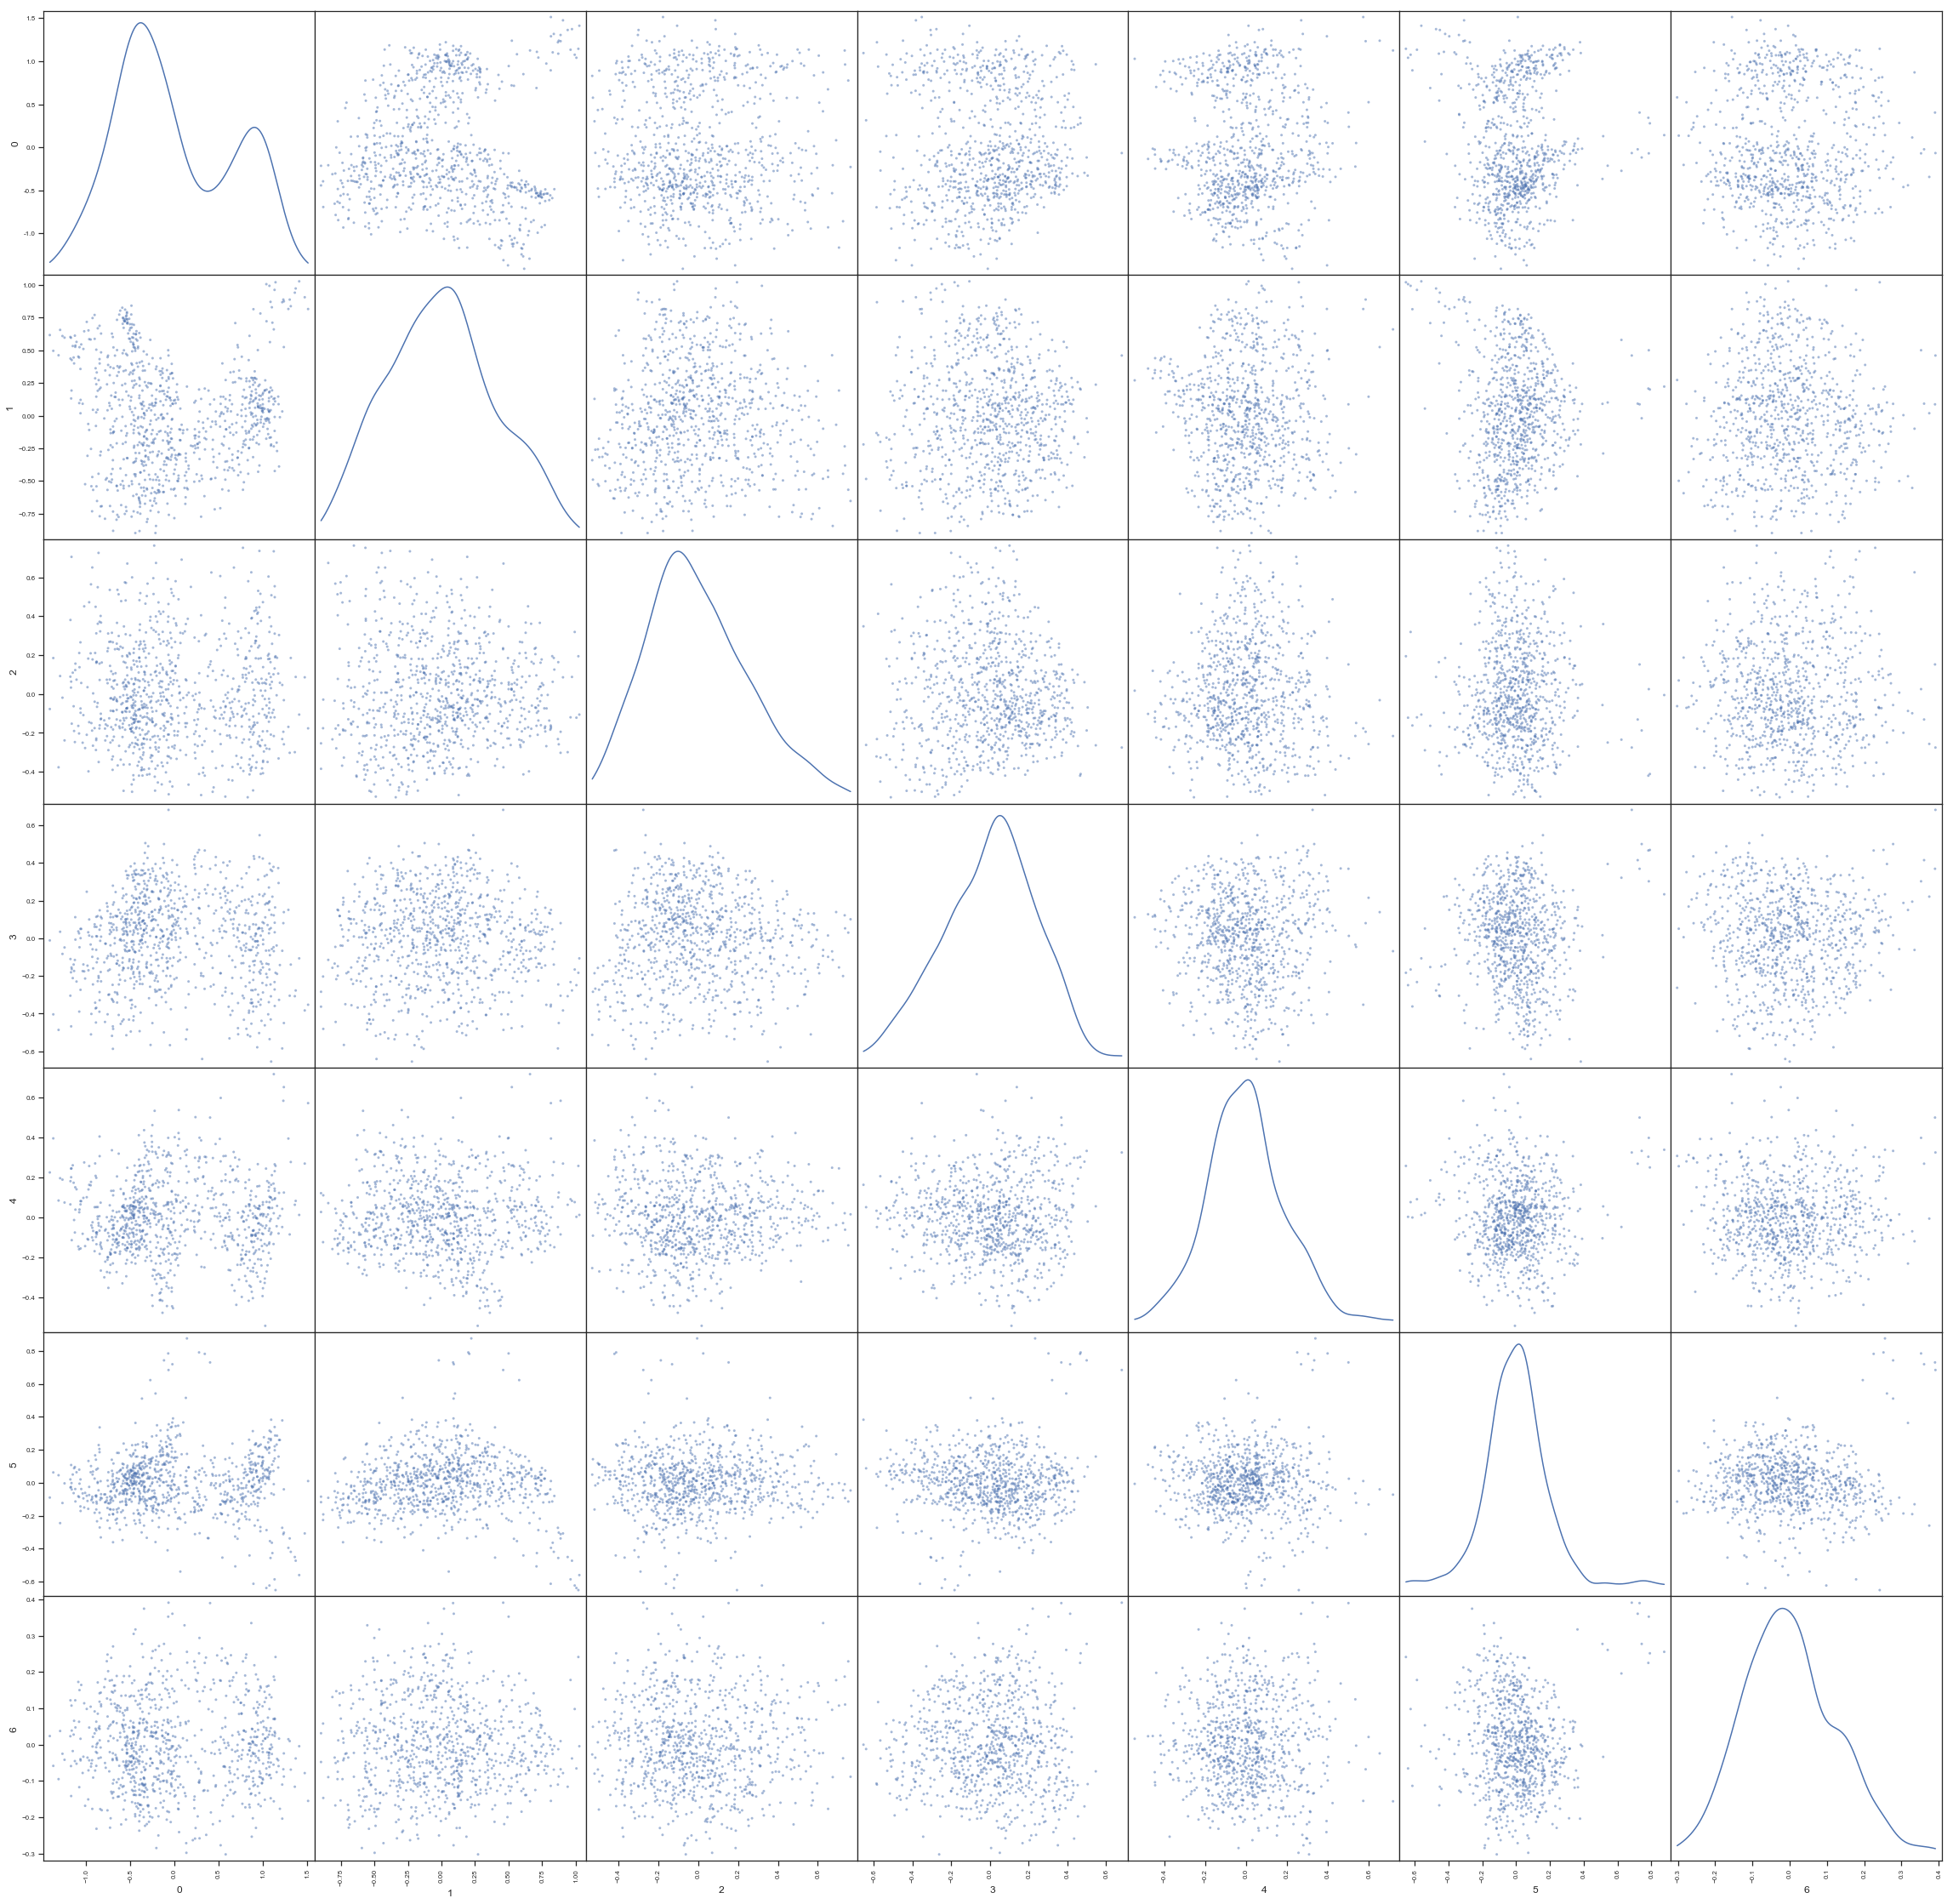

In [273]:
spd = scatter_matrix(pd.DataFrame(pca_vehicle_impute_df), figsize = (40,40), diagonal='kde')


We can see that the accuracy of the SVM classification has gone down by 4-5% after PCA, with 7 components. However, the GNB model accuracy has gone up after PCA. From the scatter plot above it is also evident that after PCA the correlation between the features is minimal from the cloud-like distribution of the points.


### Conclusion

Based on various model evaluation including RFE in this case study, a given silhouette can be classified with 89% accuracy using PCA, with n-components=7, before using SVM classification which is a supervised training algorithms on the dataset. 